In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in \\\

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
        
        # Any results you write to the current directory are saved as output.

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# read dataset

In [4]:
# load and preview data
df=pd.read_csv("C:/Users/asus/cancer_datasets/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# view summary of datasset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# declare feature vector and target variable

In [8]:
X=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
y=df['diagnosis']

In [10]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 653.6 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.3 MB 409.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.3 MB 984.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.3 MB 1.1 MB/s eta 0:00:01
   -----------------

In [13]:
# build the lightgbm model
import lightgbm as lgb
clf=lgb.LGBMClassifier()
clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

# model predication

In [14]:
# predict the results
y_pred=clf.predict(X_test)

# view accuracy

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('LightGBM Model accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score:0.9298


# compare test and train accuracy

In [16]:
y_pred_train=clf.predict(X_train)

In [17]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score:1.0000


# check for overfitting

In [18]:
# print the scores on training and test dataset

print('Training set score:{:.4f}'.format(clf.score(X_train,y_train)))


Training set score:1.0000


In [19]:
print('Test set_score:{:.4f}'.format(clf.score(X_test,y_test)))

Test set_score:0.9298


In [20]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[104   4]
 [  8  55]]

True Positives(TP) =  104

True Negatives(TN) =  55

False Positives(FP) =  4

False Negatives(FN) =  8


<Axes: >

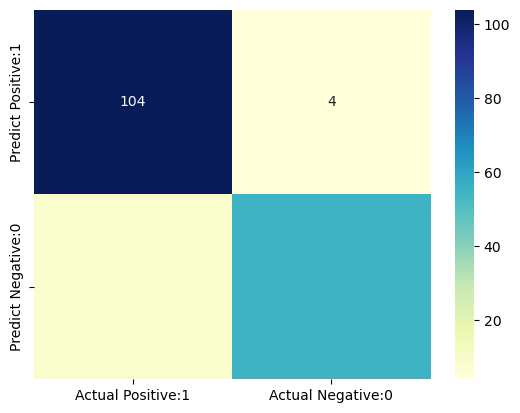

In [21]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# classification matrices

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95       108
           M       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

